In [1]:
from fastai.vision.all import *

In [2]:
path=Path(r"C:\Users\venka\OneDrive\ML\tumour_dataset\brain_tumor_dataset")

In [3]:
tumour = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [4]:
dls = tumour.dataloaders(path)

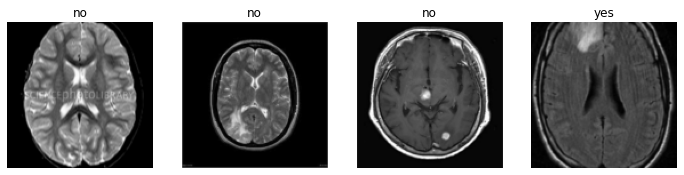

In [5]:
dls.valid.show_batch(max_n=4, nrows=1)

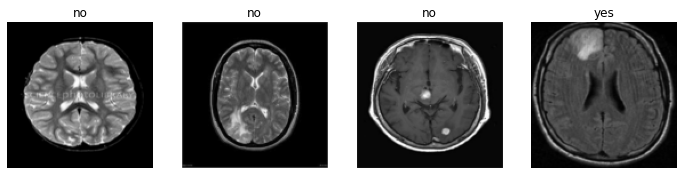

In [6]:
tumour = tumour.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = tumour.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

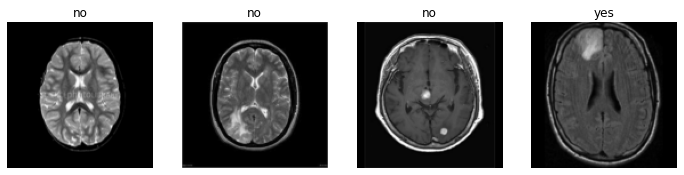

In [7]:
tumour = tumour.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = tumour.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

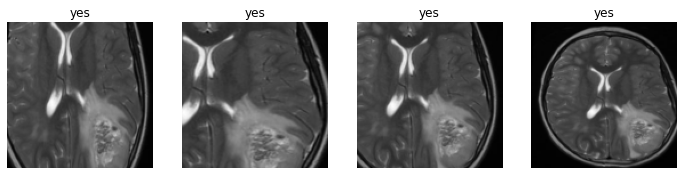

In [8]:
tumour = tumour.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = tumour.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

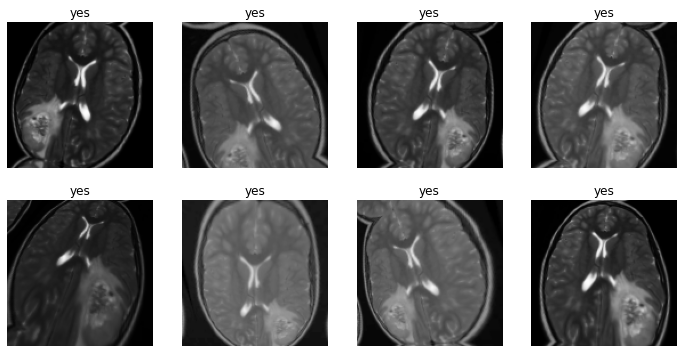

In [9]:
tumour = tumour.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = tumour.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [10]:
tumour = tumour.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = tumour.dataloaders(path)

In [11]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

C:\ProgramData\Anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.047566,2.142319,0.620000,00:18


epoch,train_loss,valid_loss,error_rate,time
0,0.963946,1.394291,0.540000,00:17
1,0.811177,0.521085,0.220000,00:17
2,0.672994,0.412428,0.160000,00:17
3,0.603880,0.378121,0.180000,00:17


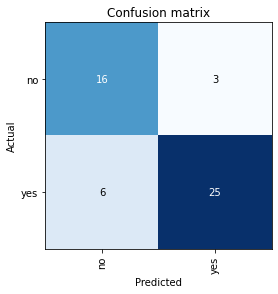

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

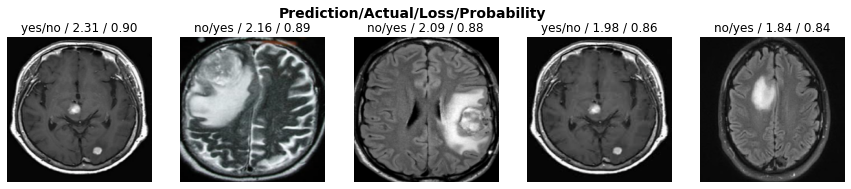

In [13]:
interp.plot_top_losses(5, nrows=1)

In [15]:
from fastai.vision.widgets import *

In [16]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [17]:
learn.export()

In [18]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [19]:
learn_inf = load_learner(path/'export.pkl')

In [20]:
learn_inf.predict('brain1.jpeg')

('no', tensor(0), tensor([0.7826, 0.2174]))

In [21]:
learn_inf.dls.vocab

['no', 'yes']

In [22]:
import ipywidgets as widgets

In [23]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

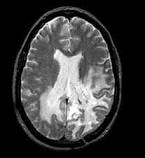

In [25]:
img = PILImage.create(btn_upload.data[-1])
img

In [26]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [27]:
pred,pred_idx,probs = learn_inf.predict(img)

In [28]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: no; Probability: 0.7826')

In [29]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [30]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [31]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [32]:
#hide_output
VBox([widgets.Label('Select your image!'), 
      btn_upload, btn_run, out_pl, lbl_pred])